In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pycaret.regression import *

In [9]:
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

## Voir ici pour plus d'info : https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [3]:
df = pd.read_csv('./data/train.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)
df['day'] = pd.to_datetime(df['datetime']).dt.dayofyear
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df.drop('datetime', axis=1, inplace=True)

df2 = df.drop(columns=['registered', 'casual'], index=1)


In [4]:
df2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,1,0
2,1,0,0,1,9.02,13.635,80,0.0000,32,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
9058,3,0,0,2,26.24,30.305,73,8.9981,341,232,19
9059,3,0,0,2,26.24,30.305,73,12.9980,274,232,20
9060,3,0,0,3,25.42,29.545,78,6.0032,190,232,21
9061,3,0,0,2,25.42,29.545,78,11.0014,56,232,22


In [5]:
exp_reg101 = setup(data = df2, target = 'count', session_id=123) 

,Description,Value
0,session_id,123
1,Target,count
2,Original Data,"(9062, 11)"
3,Missing Values,0
4,Numeric Features,6
5,Categorical Features,4
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(6343, 15)"


In [6]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,38.9228,3443.7610,58.6217,0.8822,0.4646,0.5199,0.0780
rf,Random Forest Regressor,40.6547,3865.1672,62.0601,0.8680,0.4284,0.4473,0.9250
et,Extra Trees Regressor,41.2893,4025.1442,63.3435,0.8625,0.4336,0.4565,0.7050
gbr,Gradient Boosting Regressor,53.9442,6208.3065,78.7250,0.7874,0.6658,0.9435,0.2520
dt,Decision Tree Regressor,53.2454,7424.4761,85.9855,0.7459,0.5557,0.5230,0.0400
ada,AdaBoost Regressor,83.6155,12026.2646,109.5920,0.5882,0.9513,2.0099,0.1250
knn,K Neighbors Regressor,85.0382,14680.3282,121.1085,0.4976,1.0446,2.6373,0.0310
ridge,Ridge Regression,100.0298,18303.1678,135.2129,0.3740,1.2063,3.2603,0.0190
br,Bayesian Ridge,99.9749,18304.4082,135.2155,0.3740,1.2067,3.2502,0.0200
lr,Linear Regression,100.0310,18303.2977,135.2134,0.3740,1.2063,3.2604,0.7700


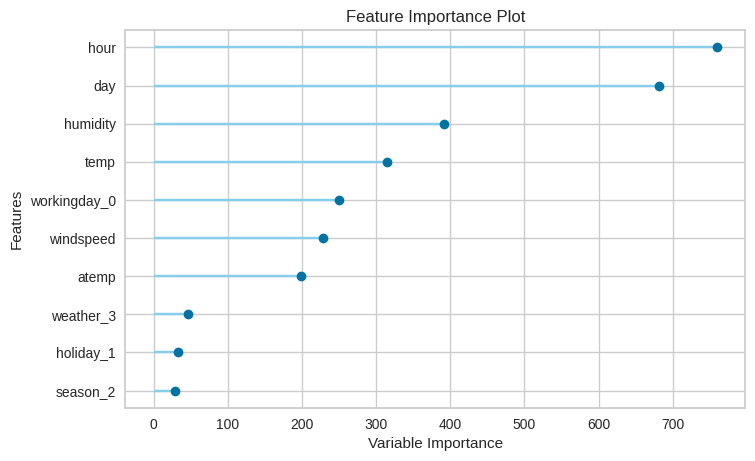

In [7]:
plot_model(best, plot='feature')

In [8]:
# To save the model with pickle file 
# save_model(best,'lightgbm-location-velo')